In [1]:
import seaborn as sns

sns.set_theme(style="whitegrid")

methods_sm_data = {
    "SpecEmbedding": {
        "ARI": 0.51,
        "Purity": 0.92,
        "Homogeneity": 0.97,
        "Completeness": 0.89,
        "V-Score": 0.94
    },
    "MSBERT": {
        "ARI": 0.20,
        "Purity": 0.76,
        "Homogeneity": 0.88,
        "Completeness": 0.78,
        "V-Score": 0.84
    },
    "DreaMS": {
        "ARI": 0.16,
        "Purity": 0.65,
        "Homogeneity": 0.85,
        "Completeness": 0.74,
        "V-Score": 0.81
    },
    "Spec2Vec": {
        "ARI": 0.09,
        "Purity": 0.52,
        "Homogeneity": 0.72,
        "Completeness": 0.71,
        "V-Score": 0.71
    },
    "MS2DeepScore": {
        "ARI": 0.23,
        "Purity": 0.47,
        "Homogeneity": 0.74,
        "Completeness": 0.71,
        "V-Score": 0.73
    },
}

methods_mb_data = {
    "SpecEmbedding": {
        "ARI": 0.50,
        "Purity": 0.95,
        "Homogeneity": 0.98,
        "Completeness": 0.88,
        "V-Score": 0.95
    },
    "MSBERT": {
        "ARI": 0.24,
        "Purity": 0.81,
        "Homogeneity": 0.89,
        "Completeness": 0.77,
        "V-Score": 0.84
    },
    "DreaMS": {
        "ARI": 0.17,
        "Purity": 0.70,
        "Homogeneity": 0.86,
        "Completeness": 0.72,
        "V-Score": 0.81
    },
    "Spec2Vec": {
        "ARI": 0.10,
        "Purity": 0.57,
        "Homogeneity": 0.71,
        "Completeness": 0.69,
        "V-Score": 0.70
    },
    "MS2DeepScore": {
        "ARI": 0.29,
        "Purity": 0.59,
        "Homogeneity": 0.78,
        "Completeness": 0.75,
        "V-Score": 0.77
    },
    # "": {

    # }
}

In [2]:
from pathlib import Path

DIR = Path("./cluster")
DIR.mkdir(exist_ok=True, parents=True)

In [3]:
import pandas as pd

def data2df(methods_data):
    df = pd.DataFrame(columns=["method", "metric", "value"])
    for method, metrics in methods_data.items():
        for metric, value in metrics.items():
            row = [method]
            row.append(metric)
            row.append(value)
            df.loc[len(df)] = row
    return df

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set_style("whitegrid")
sns.set_palette("tab10")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

def barplot(df):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3.5), dpi=300)
    ax.set_title("Cluster Result")
    sns.barplot(data=df, x="metric", y="value", hue="method", ax=ax)
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Score")
    ax.legend(bbox_to_anchor=(1.05, 0.2), loc="center left", frameon=False)
    fig.tight_layout()
    return fig

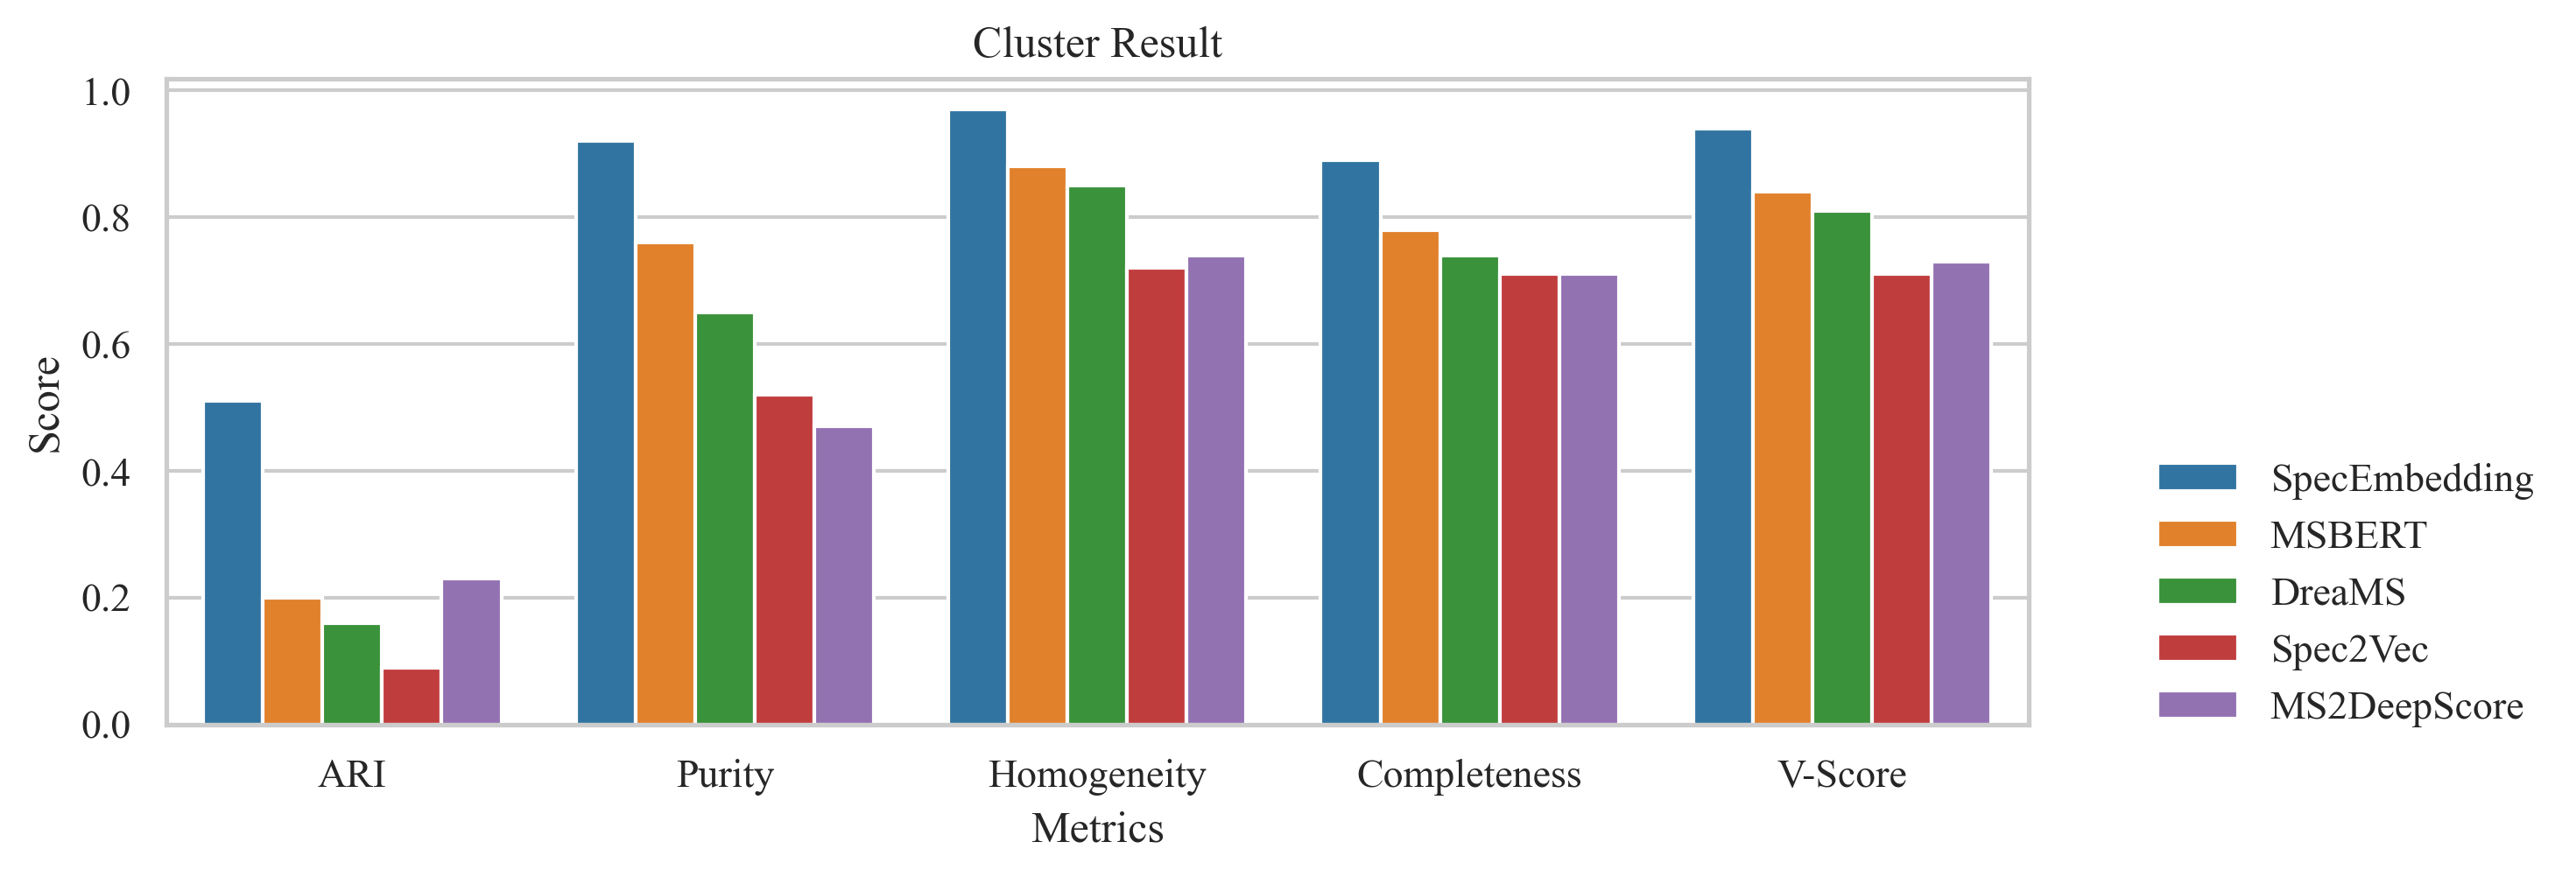

In [5]:
df = data2df(methods_sm_data)
fig_sm = barplot(df)
fig_sm.savefig(DIR / "cluster_bar_sm.svg", transparent=True, bbox_inches="tight")
fig_sm.savefig(DIR / "cluster_bar_sm.png", transparent=True, bbox_inches="tight")
fig_sm.savefig(DIR / "cluster_bar_sm.pdf", transparent=True, bbox_inches="tight")

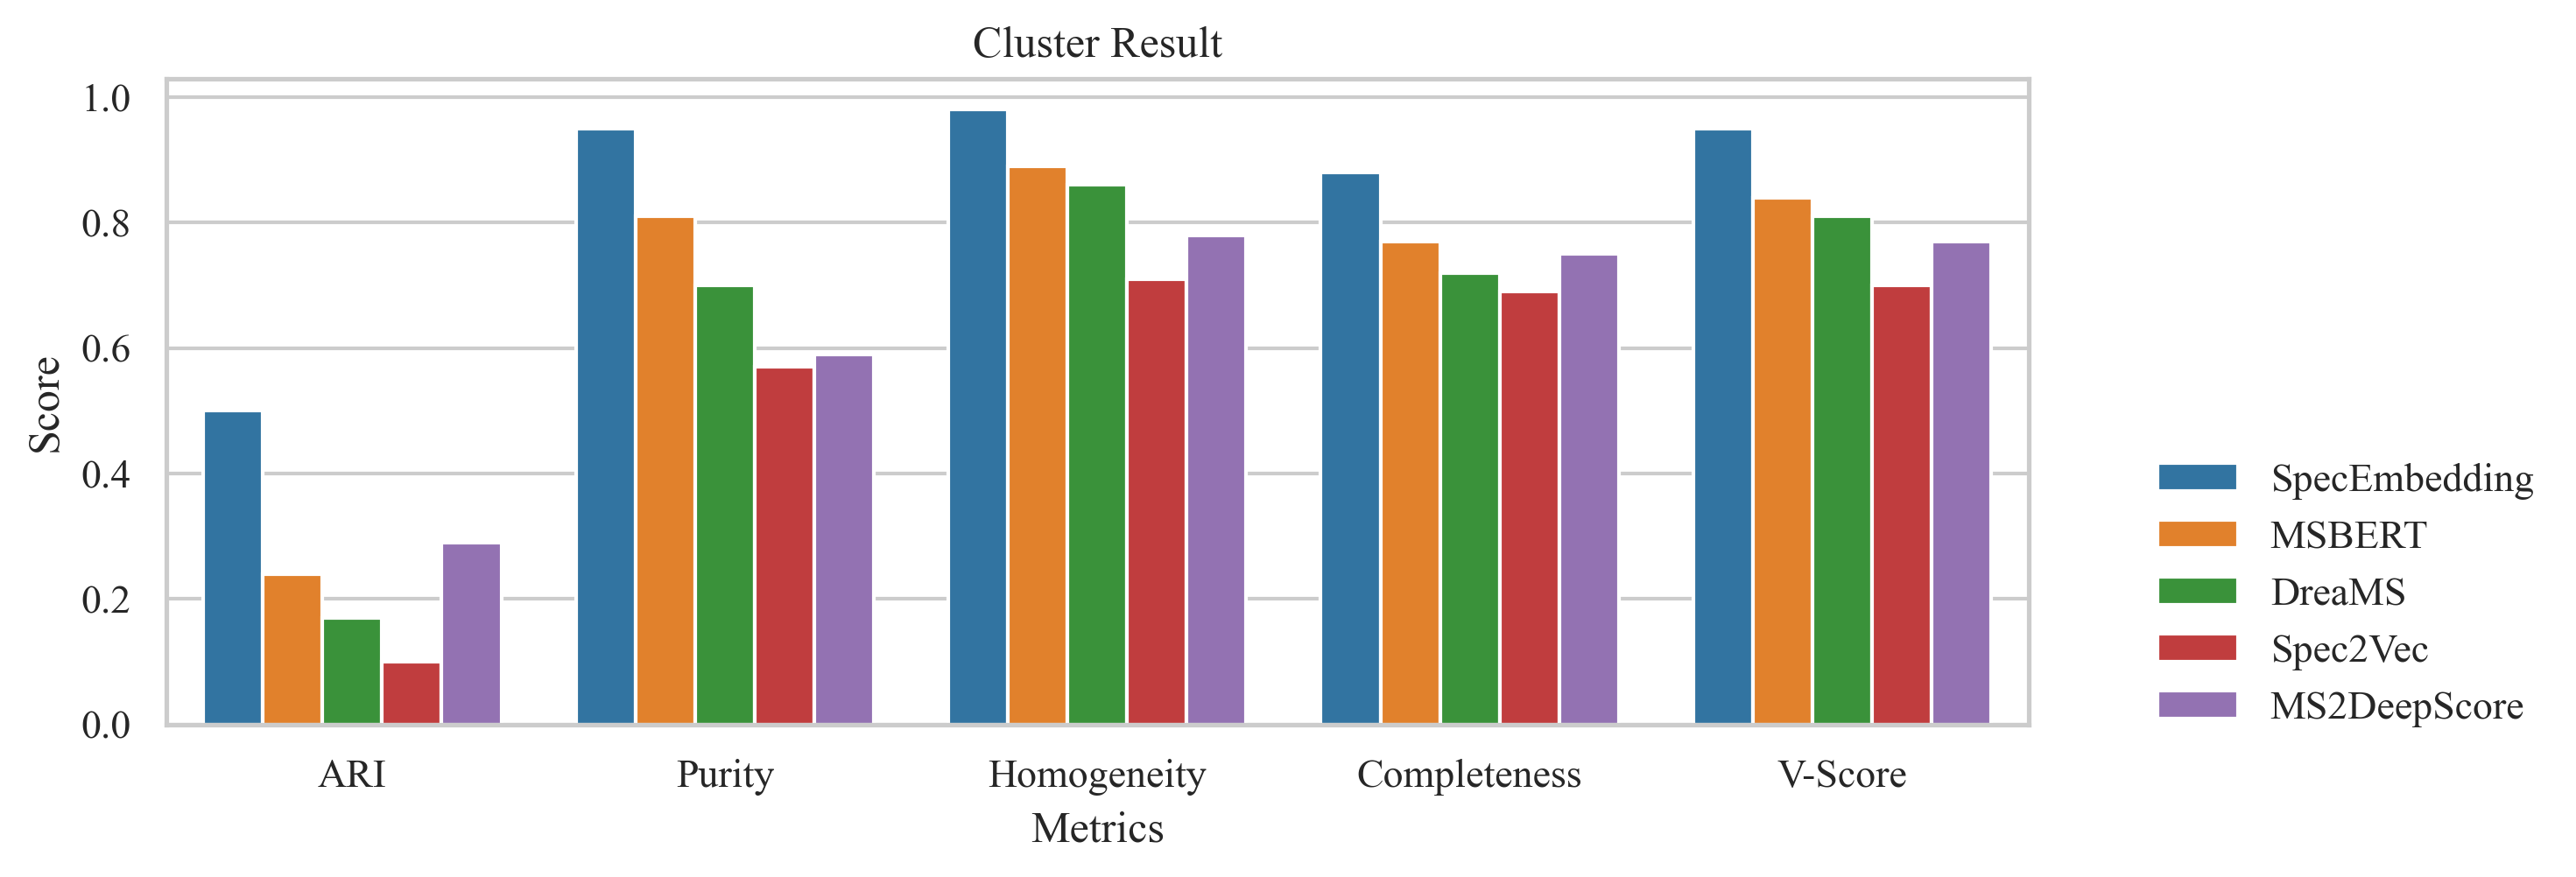

In [6]:
df = data2df(methods_mb_data)
fig_mb = barplot(df)
fig_mb.savefig(DIR / "cluster_bar_mb.svg", transparent=True, bbox_inches="tight")
fig_mb.savefig(DIR / "cluster_bar_mb.png", transparent=True, bbox_inches="tight")
fig_mb.savefig(DIR / "cluster_bar_mb.pdf", transparent=True, bbox_inches="tight")

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def radar_plot(df, hue_order):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=300, subplot_kw=dict(polar=True))
    for method in hue_order:
        labels = df[df["method"] == method]["metric"].values
        values = df[df["method"] == method]["value"].values
        
        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
        values = np.concatenate((values, [values[0]]))
        angles = np.concatenate((angles, [angles[0]]))
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, linewidth=0.75, label=method)
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8], size=10, c="gray")
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.spines['polar'].set_visible(False)
    ax.legend(bbox_to_anchor=(1.02, 0.2), loc="center left", ncol=1, frameon=False)
    fig.tight_layout()
    return fig

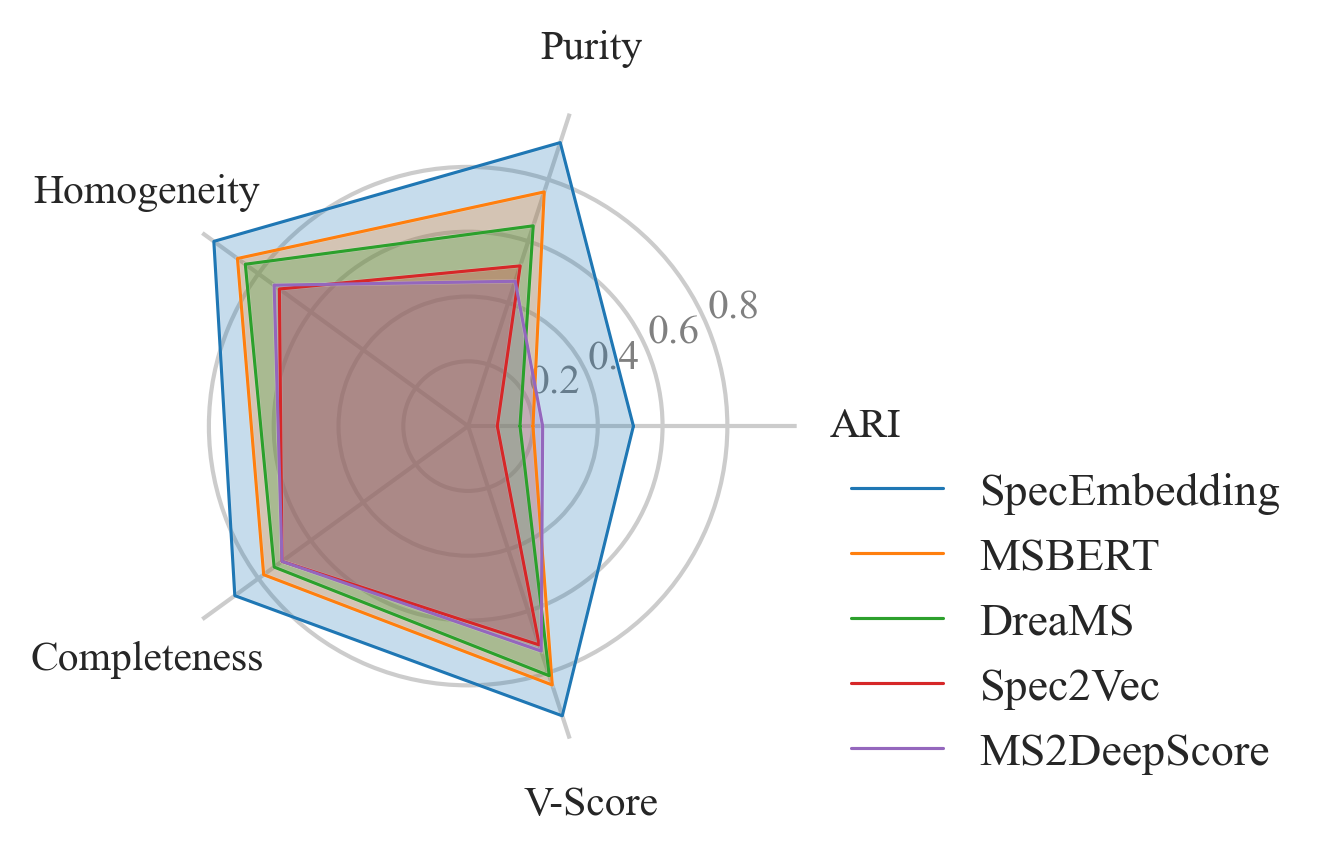

In [10]:
df = data2df(methods_sm_data)
fig_sm = radar_plot(df, ["SpecEmbedding", "MSBERT", "DreaMS", "Spec2Vec", "MS2DeepScore"])
fig_sm.savefig(DIR / "cluster_radar_sm.svg", transparent=True, bbox_inches="tight")
fig_sm.savefig(DIR / "cluster_radar_sm.png", transparent=True, bbox_inches="tight")
fig_sm.savefig(DIR / "cluster_radar_sm.pdf", transparent=True, bbox_inches="tight")

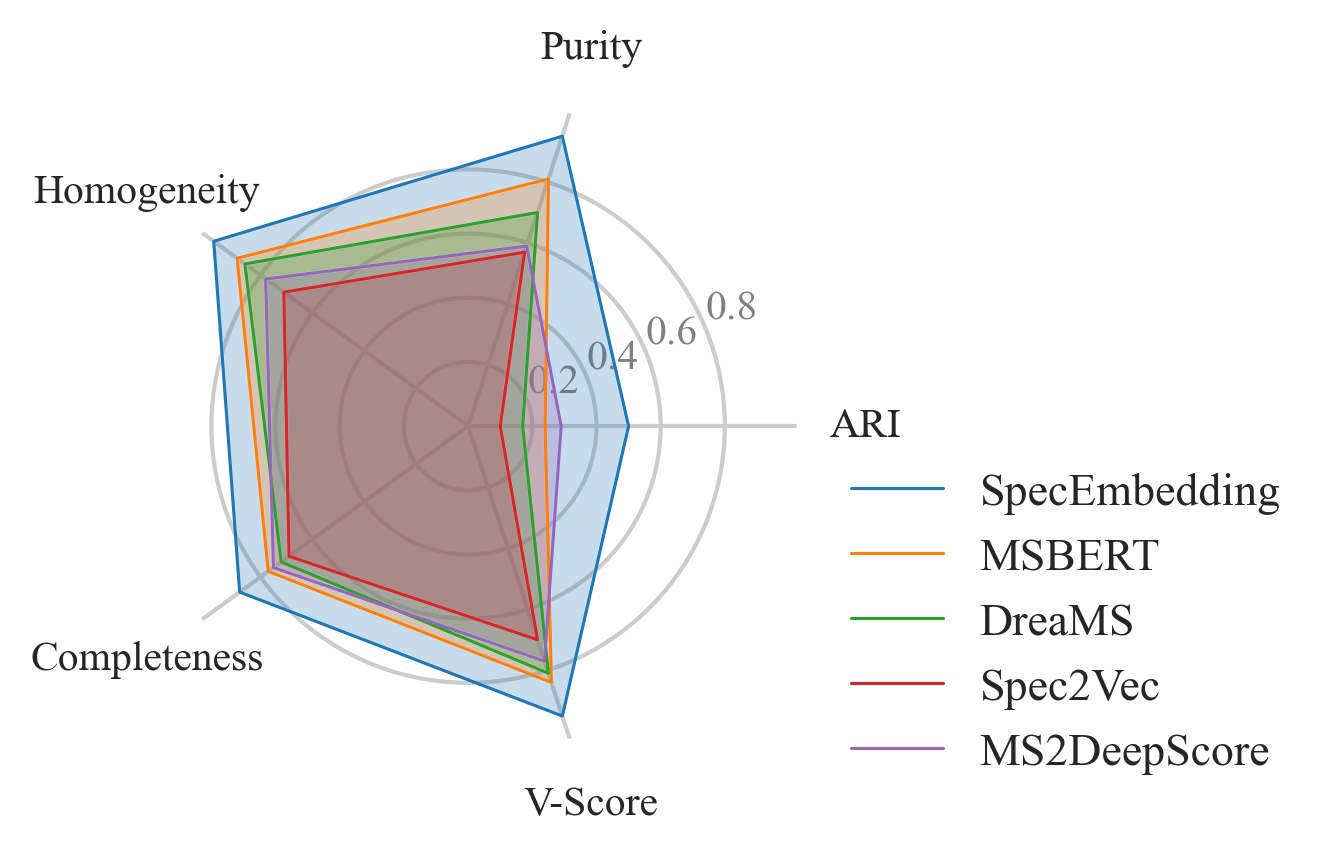

In [11]:
df = data2df(methods_mb_data)
fig_mb = radar_plot(df, ["SpecEmbedding", "MSBERT", "DreaMS", "Spec2Vec", "MS2DeepScore"])
fig_mb.savefig(DIR / "cluster_radar_mb.svg", transparent=True, bbox_inches="tight")
fig_mb.savefig(DIR / "cluster_radar_mb.png", transparent=True, bbox_inches="tight")
fig_mb.savefig(DIR / "cluster_radar_mb.pdf", transparent=True, bbox_inches="tight")